In [1]:
import os
import json
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set constants

PATH = "data/"
DATA_PATH="crawler_data/data/"
DOMAINS = {
#     "cnn.com": 0,
    "nytimes.com": 0,
    "washingtonpost.com": 0,
    "huffpost.com": 0,
    "vox.com": 0,
    "wsj.com": 1,
    "foxnews.com": 1,
    "washingtontimes.com": 1,
    "breitbart.com": 1,
    "nypost.com": 1
}
NUM_ARTICLES_PER_DOMAIN = 500

In [4]:
def get_label(source_domain):
    return DOMAINS[source_domain] if source_domain in DOMAINS else None

In [5]:
articles = []

def walk_through_dir(dir):
    for root, dirs, files in os.walk(dir):
        files = (file_path for file_path in files if file_path.endswith(".json"))
        for file_path in files:
            with open(root + "/" + file_path) as file:
                data = json.load(file)
                if data["maintext"] and data["source_domain"]:
                    label = get_label(data["source_domain"])
                    if label is not None:
                        articles.append({"Article_Title": data["title"],
                                         "Article_Text": data["maintext"],
                                         "Publish_Date": data["date_publish"],
                                         "Source": data["source_domain"],
                                         "Language": data["language"],
                                         "Label": label})
                    else:
                        print("Could not get label for source_domain:", data["source_domain"])
                else:
                    print("Missing maintext or source_domain")
        for dir in dirs:
            walk_through_dir(dir)

walk_through_dir(DATA_PATH)
dataset = pd.DataFrame(articles)
print(Counter(dataset.loc[dataset["Language"] == "en"]["Source"]))
print(Counter(dataset.loc[dataset["Language"] == "en"]["Label"]))

Missing maintext or source_domain
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for source_domain: cnn.com
Could not get label for so

Missing maintext or source_domain
Missing maintext or source_domain
Missing maintext or source_domain
Missing maintext or source_domain
Missing maintext or source_domain
Missing maintext or source_domain
Missing maintext or source_domain
Missing maintext or source_domain
Missing maintext or source_domain
Missing maintext or source_domain
Counter({'washingtontimes.com': 2384, 'foxnews.com': 1051, 'nytimes.com': 596, 'huffpost.com': 588, 'breitbart.com': 588, 'washingtonpost.com': 552, 'vox.com': 542, 'nypost.com': 511})
Counter({1: 4534, 0: 2278})


In [58]:
filtered_dataset = pd.DataFrame(columns = ["Article_Title", "Article_Text", "Source", "Label"])

for source in dataset["Source"].unique():
    articles = dataset.loc[(dataset["Source"] == source) & (dataset["Language"] == "en")]
    articles = articles.sample(frac=1)
    articles = articles[:NUM_ARTICLES_PER_DOMAIN]
    filtered_dataset = filtered_dataset.append(articles)
    
print(Counter(filtered_dataset["Source"]))
print(Counter(filtered_dataset["Label"]))

Counter({'vox.com': 500, 'nypost.com': 500, 'huffpost.com': 500, 'washingtontimes.com': 500, 'washingtonpost.com': 500, 'foxnews.com': 500, 'nytimes.com': 500, 'breitbart.com': 500})
Counter({0: 2000, 1: 2000})


In [6]:
# Save dataset to disk

print("Saving dataset to disk")
Path(PATH).mkdir(parents=True, exist_ok=True)
dataset.to_csv(PATH + "dataset.csv", index=False)
print("Done")

Saving dataset to disk
Done


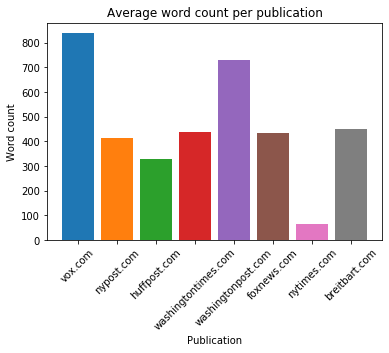

In [59]:
for source in filtered_dataset["Source"].unique():
    numWords = filtered_dataset.loc[filtered_dataset["Source"] == source]["Article_Text"].str.split().apply(len)
    plt.bar(source, numWords.mean())
    
plt.title("Average word count per publication")
plt.xticks(filtered_dataset["Source"].unique(), rotation=45)
plt.ylabel("Word count")
plt.xlabel("Publication")
plt.show()

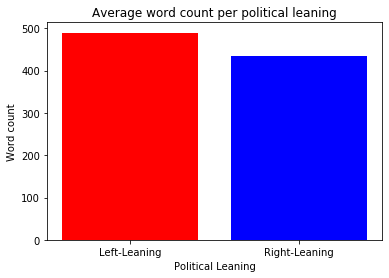

In [67]:
labelNames = ["Left-Leaning", "Right-Leaning"]
colors = ["red", "blue"]

for label in filtered_dataset["Label"].unique():
    numWords = filtered_dataset.loc[filtered_dataset["Label"] == label]["Article_Text"].str.split().apply(len)
    plt.bar(labelNames[label], numWords.mean(), color=colors[label])
    
plt.title("Average word count per political leaning")
plt.ylabel("Word count")
plt.xlabel("Political Leaning")
plt.show()

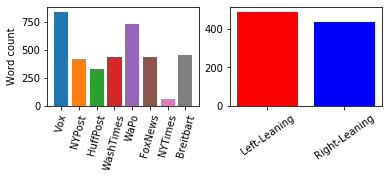

In [92]:
plt.title("Average word count per political leaning")

sourceNames = ["Vox", "NYPost", "HuffPost", "WashTimes", "WaPo", "FoxNews", "NYTimes", "Breitbart"]
labelNames = ["Left-Leaning", "Right-Leaning"]

plt.subplot(2, 2, 1)
for source, sourceName in zip(filtered_dataset["Source"].unique(), sourceNames):
    numWords = filtered_dataset.loc[filtered_dataset["Source"] == source]["Article_Text"].str.split().apply(len)
    plt.bar(sourceName, numWords.mean())
    
plt.ylabel("Word count")
plt.xticks(sourceNames, rotation=75)

plt.subplot(2, 2, 2)
colors = ["red", "blue"]

for label in filtered_dataset["Label"].unique():
    numWords = filtered_dataset.loc[filtered_dataset["Label"] == label]["Article_Text"].str.split().apply(len)
    plt.bar(labelNames[label], numWords.mean(), color=colors[label])

plt.xticks(labelNames, rotation=35)
plt.show()